In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
import math
from scipy.stats import linregress
from matplotlib.offsetbox import AnchoredText

sys.path.append('../../Classes')
from DataHandler import DataHandler
from NNModelTrainer import NNModelTrainer
from NNModelTester import NNModelTester

### Data + Model training + Tests

In [33]:
data = DataHandler(validation_sample= True, features_txt= 'all_features.txt', fields_list=['W02', 'W03', 'W04'], balance= 'weights')
data.main()

Members: 202787 (32.69%)
Non members: 417621 (67.31%)
----------------------------------------------------------------------
Training: 141951 members, 292334 non members
Validation: 42585 members, 87701 non members
Testing: 18251 members, 37586 non members
----------------------------------------------------------------------


In [37]:
# layers_s_dropout = [
#     tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(1, activation='sigmoid')
#     ]

# compile_params = dict(
#         optimizer = tf.keras.optimizers.Adam(),
#         loss = tf.keras.losses.BinaryCrossentropy(),
#         metrics=[]   
#     )

mod = NNModelTrainer(layers= layers_s_dropout, name= 'all_features', data= data, compile_params= None)
# mod.train_model()
mod.load_model() # if model is already trained

In [38]:
test = NNModelTester(model= mod.model, data= data, name= 'all_features', history= mod.history)
test.predict()
test.curves()
test.write_report(extra_args= mod.args(), to_file = False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 61)               123       
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                3968      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                        

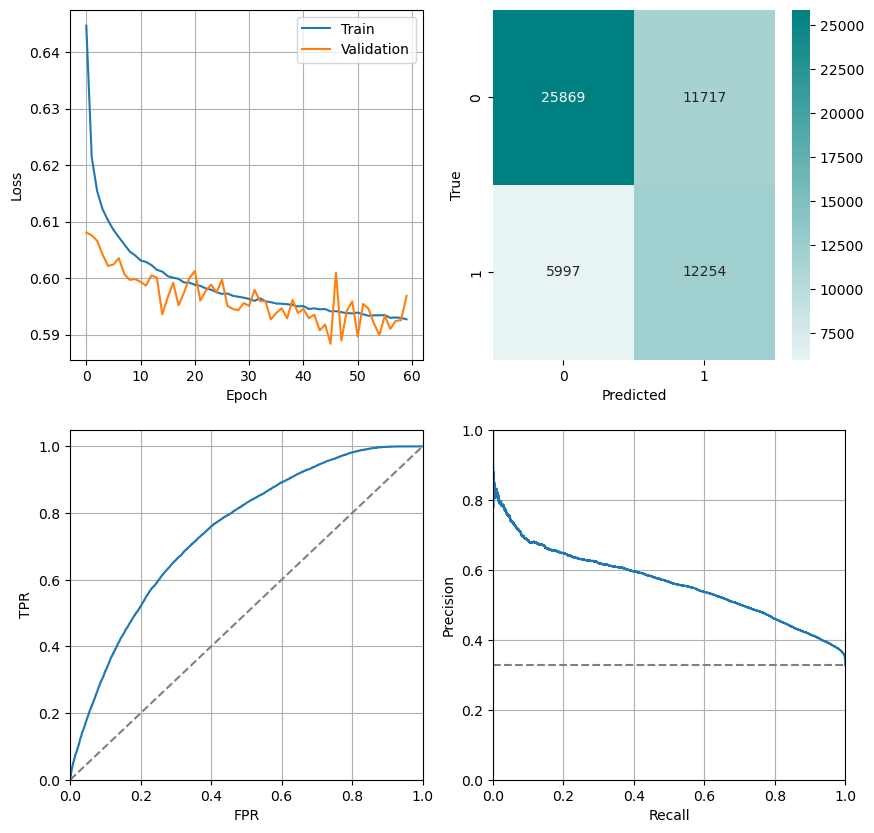

In [39]:
test.plot_report(to_file = False)

### Data + Model training + Tests with z_BCG

In [13]:
data_bcg = DataHandler(validation_sample= True, features_txt= 'all_features_bcg.txt', fields_list=['W02', 'W03', 'W04'], balance= 'weights')
data_bcg.main()

Members: 202787 (32.69%)
Non members: 417621 (67.31%)
----------------------------------------------------------------------
Training: 141951 members, 292334 non members
Validation: 42585 members, 87701 non members
Testing: 18251 members, 37586 non members
----------------------------------------------------------------------


In [14]:
# layers_s_dropout = [
#     tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(1, activation='sigmoid')
#     ]

# compile_params = dict(
#         optimizer = tf.keras.optimizers.Adam(),
#         loss = tf.keras.losses.BinaryCrossentropy(),
#         metrics=[]   
#     )

mod_bcg = NNModelTrainer(layers= None, name= 'all_features_bcg', data= data, compile_params= None)
# mod.train_model()
mod_bcg.load_model() # if model is already trained

In [15]:
test_bcg = NNModelTester(model= mod_bcg.model, data= data_bcg, name= 'all_features_bcg', history= mod_bcg.history)
test_bcg.predict()
test_bcg.curves()
test_bcg.write_report(extra_args= mod_bcg.args(), to_file = False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 62)               125       
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                4032      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                      

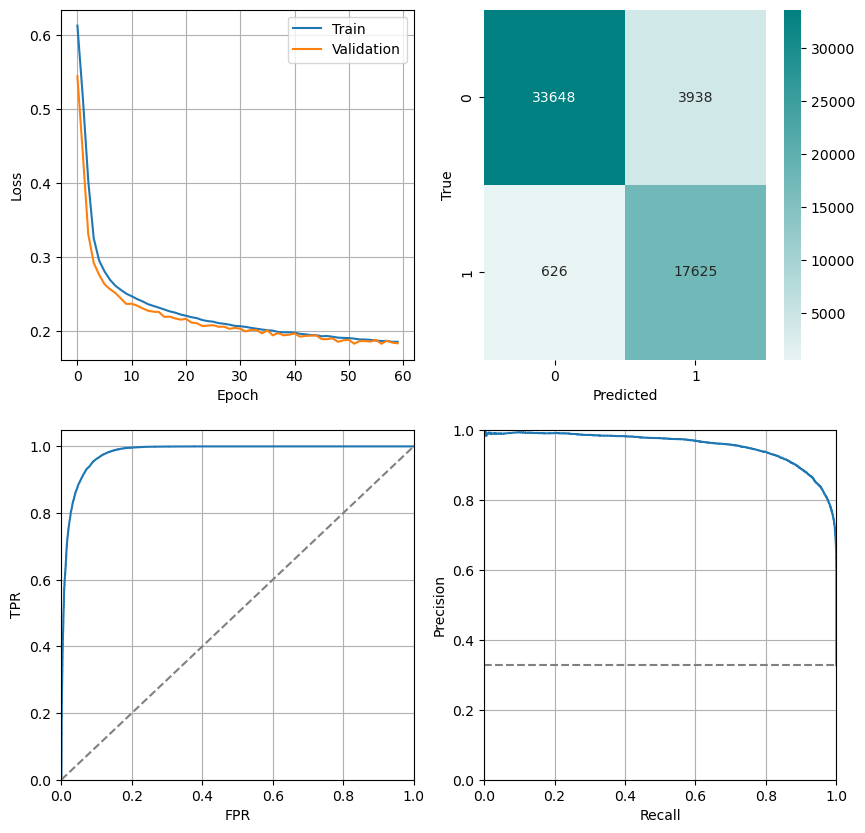

In [16]:
test_bcg.plot_report(to_file = False)

### Color magnitude plots: truth vs prediction

In [40]:
df_cl = pd.read_table('../../DATA/clusters.dat', delim_whitespace=True, usecols=[0,5],  names=['id_cl','phot_z_cl'])
#  usecols=[0,3,4,5,9,11,12],  names=['id_cl','ra_cl','dec_cl','phot_z_cl', 'r500_cl','mass_cl','n500_cl']

df_ = pd.DataFrame()
df_bcg_ = pd.DataFrame()
df_['id_cl_near_eval'] = [eval(p)[0] for p in data.testing.id_cl_near.values]
df_['z_cl'] = [df_cl[df_cl.id_cl == i]['phot_z_cl'].values[0] for i in df_.id_cl_near_eval]
df_bcg_['id_cl_near_eval'] = [eval(p)[0] for p in data_bcg.testing.id_cl_near.values]
df_bcg_['z_cl'] = [df_cl[df_cl.id_cl == i]['phot_z_cl'].values[0] for i in df_bcg_.id_cl_near_eval]

In [23]:
min_ = 0.
max_ = 1.4
step = 0.2
n_bins = round((max_ - min_)/step)
z_centers = np.linspace(min_ + step/2., max_ - step/2., n_bins)
z_lims = np.linspace(min_, max_, n_bins + 1)

print(z_centers)
print(z_lims)

[0.1 0.3 0.5 0.7 0.9 1.1 1.3]
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4]


In [41]:
def sub_func_col_mag(magnitude1, magnitude2, clim, mlim, nmem, mem, nmem_sam, z, i, typ):
    plt.subplot(n_bins, 3, i)
    sns.scatterplot(y = nmem[magnitude1] - nmem[magnitude2], x = nmem[magnitude2], marker = '+', alpha = 0.3, color = 'grey', zorder = 1,  label = 'Non-members')
    sns.kdeplot(y = nmem_sam[magnitude1] - nmem_sam[magnitude2], x = nmem_sam[magnitude2], levels = 8, color = 'grey', zorder = 2)
    sns.scatterplot(y = mem[magnitude1] - mem[magnitude2], x = mem[magnitude2], marker = '+', alpha = 0.3, label = 'Members', color = 'indigo', zorder = 3)
    
    plt.grid()
    plt.xlabel(f'{magnitude2}')
    plt.ylabel(f'{magnitude1} - {magnitude2}')
    plt.ylim(clim)
    plt.xlim(mlim)
    plt.title(f'{z - step/2 :.1f} < z < {z + step/2 :.1f} ({typ})')

    fit = linregress(mem[magnitude2].values, mem[magnitude1].values - mem[magnitude2].values)
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = fit[1] + fit[0] * x_vals
    plt.plot(x_vals, y_vals, ls = '--', color = 'indigo')

    text = f'slope: {fit.slope :.3f} +/- {fit.stderr :.3f}\nintercept: {fit.intercept :.3f} +/- {fit.intercept_stderr :.3f}'
    text_box = AnchoredText(text, frameon=True, loc=4, pad=0.5)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    plt.gca().add_artist(text_box)

def col_mag(magnitude1, magnitude2, clim, mlim, sample = 1000):
    plt.figure(figsize = (13, 4.*n_bins))

    for i_z,z in enumerate(z_centers):
        
        cond = (df_.z_cl > z - step/2. ) & (df_.z_cl < z+step/2. )
        cond = cond.values
        cond_bcg = (df_bcg_.z_cl > z - step/2. ) & (df_bcg_.z_cl < z+step/2. )
        cond_bcg = cond_bcg.values

        # truth
        mem = data.testing[(data.testing.member == 1) & (cond)]
        nmem = data.testing[(data.testing.member == 0) & cond]
        try:
            nmem_sam = nmem.sample(n = sample, axis = 'index') # contour plot takes forever. use sample
        except:
            nmem_sam = nmem
        sub_func_col_mag(magnitude1, magnitude2, clim, mlim, nmem, mem, nmem_sam, z, i_z*3+1, 'Truth')

        # prediction
        mem = data.testing[(test.predictions.flatten() == 1) & cond] 
        nmem = data.testing[(test.predictions.flatten() == 0) & cond]
        try:
            nmem_sam = nmem.sample(n = sample, axis = 'index') # contour plot takes forever. use sample
        except:
            nmem_sam = nmem
        sub_func_col_mag(magnitude1, magnitude2, clim, mlim, nmem, mem, nmem_sam, z, i_z*3+2, 'Prediction')

        # prediction with z_bcg
        mem = data_bcg.testing[(test_bcg.predictions.flatten() == 1) & cond_bcg] 
        nmem = data_bcg.testing[(test_bcg.predictions.flatten() == 0) & cond_bcg]
        try:
            nmem_sam = nmem.sample(n = sample, axis = 'index') # contour plot takes forever. use sample
        except:
            nmem_sam = nmem
        sub_func_col_mag(magnitude1, magnitude2, clim, mlim, nmem, mem, nmem_sam, z, i_z*3+3, 'Prediction BCG')
    plt.tight_layout(h_pad = 1.2)
    plt.show()

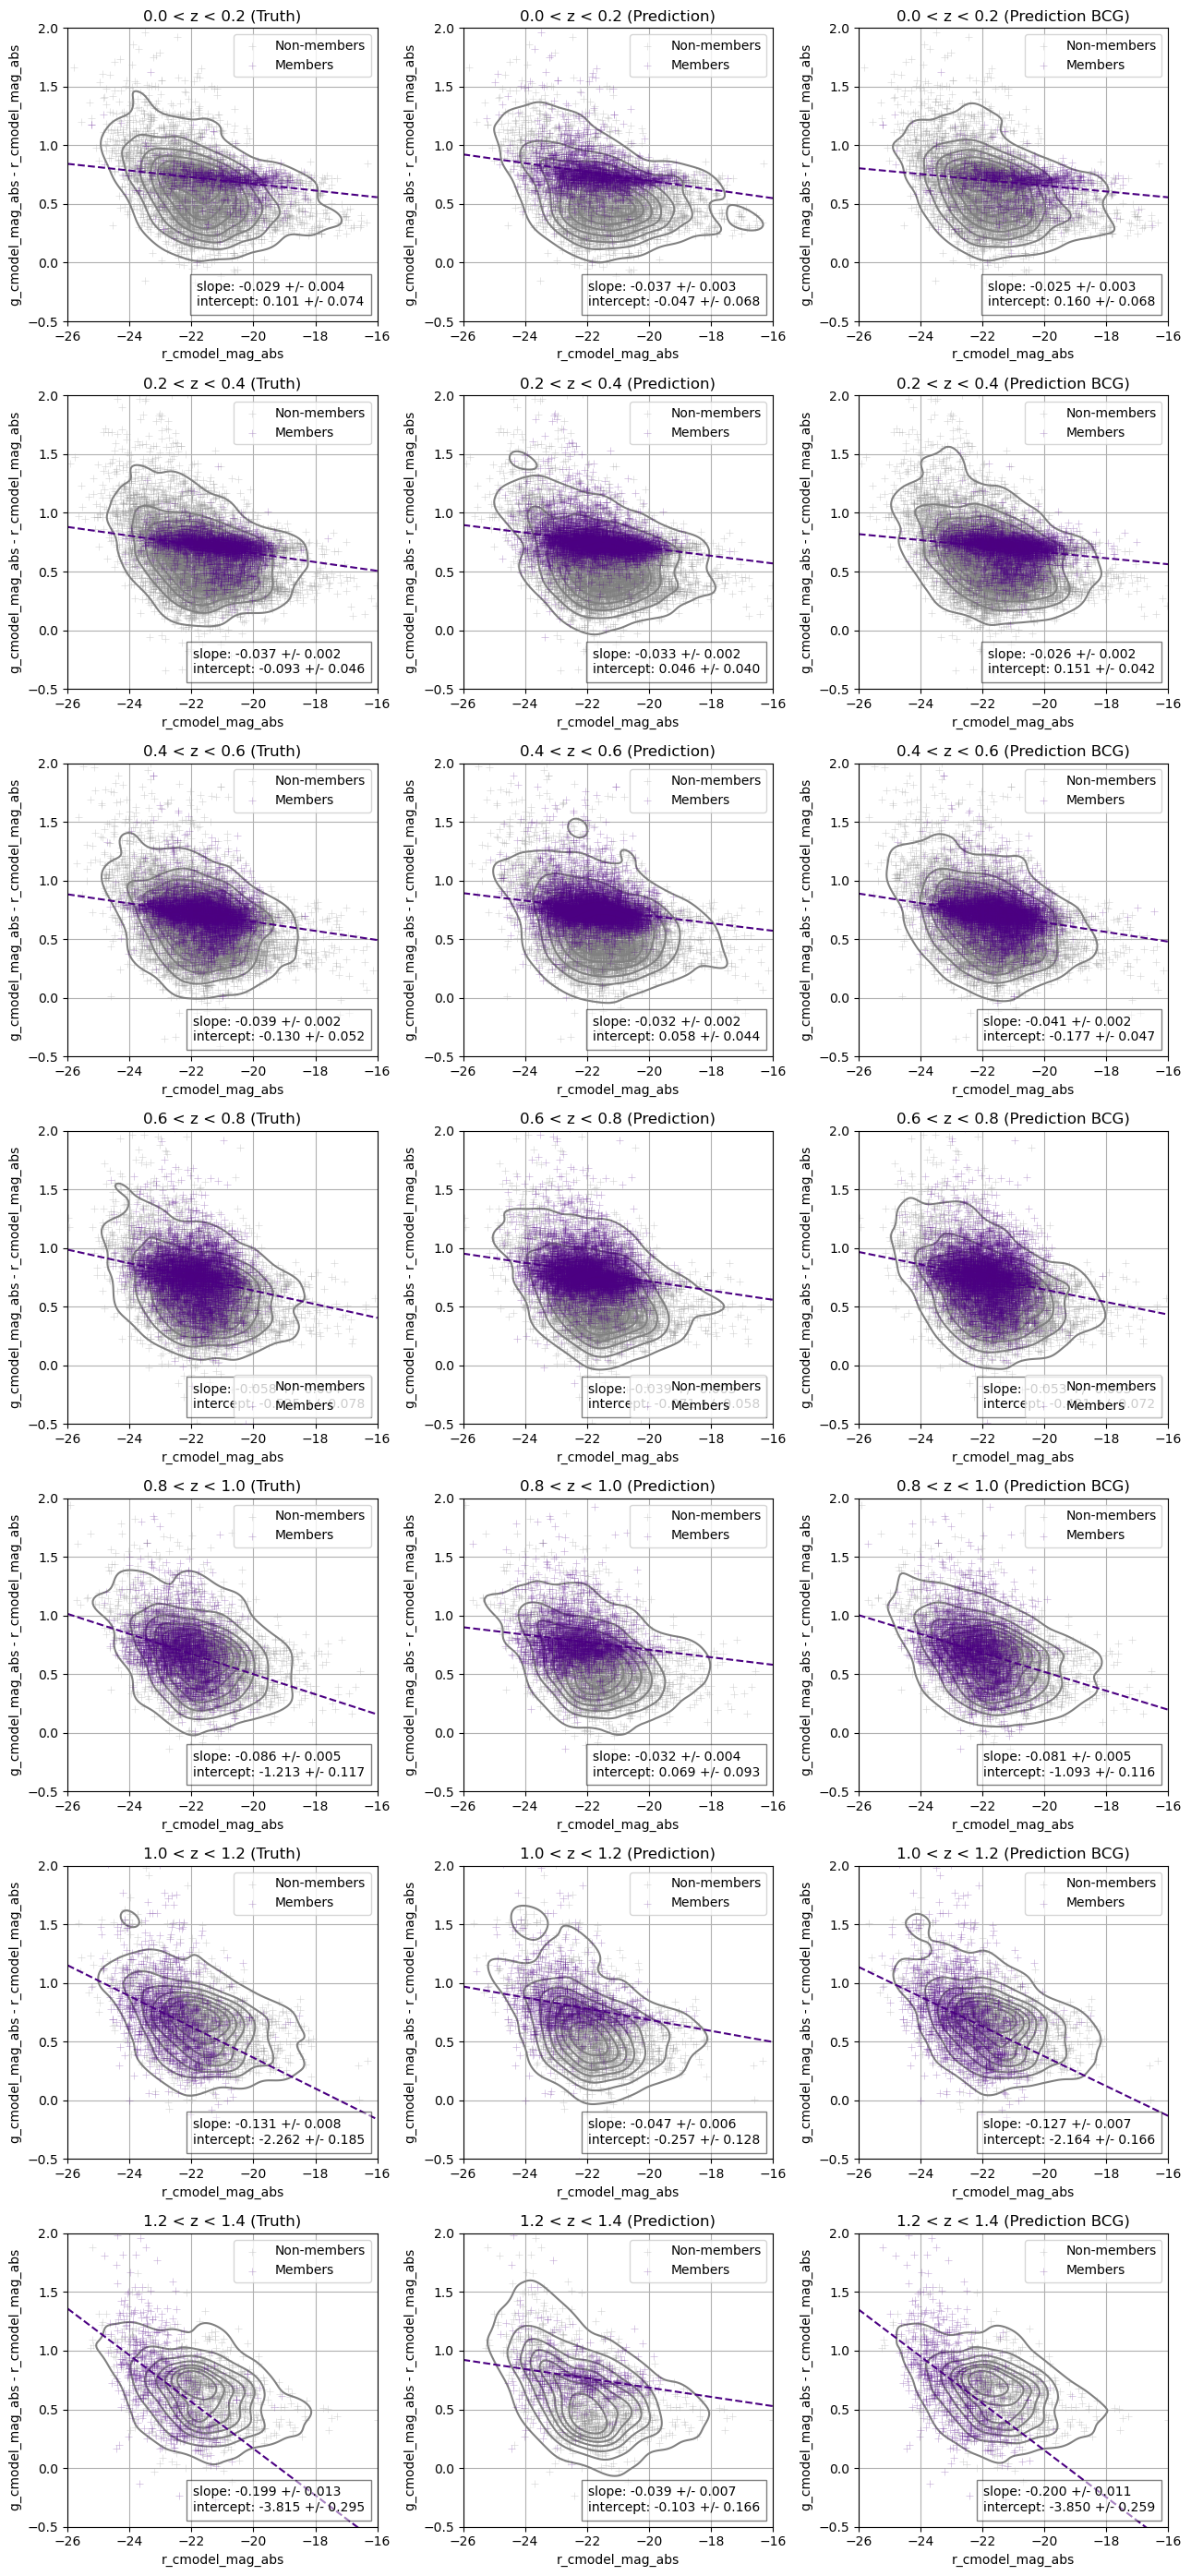

In [42]:
col_mag('g_cmodel_mag_abs', 'r_cmodel_mag_abs', (-0.5, 2.), (-26,-16))

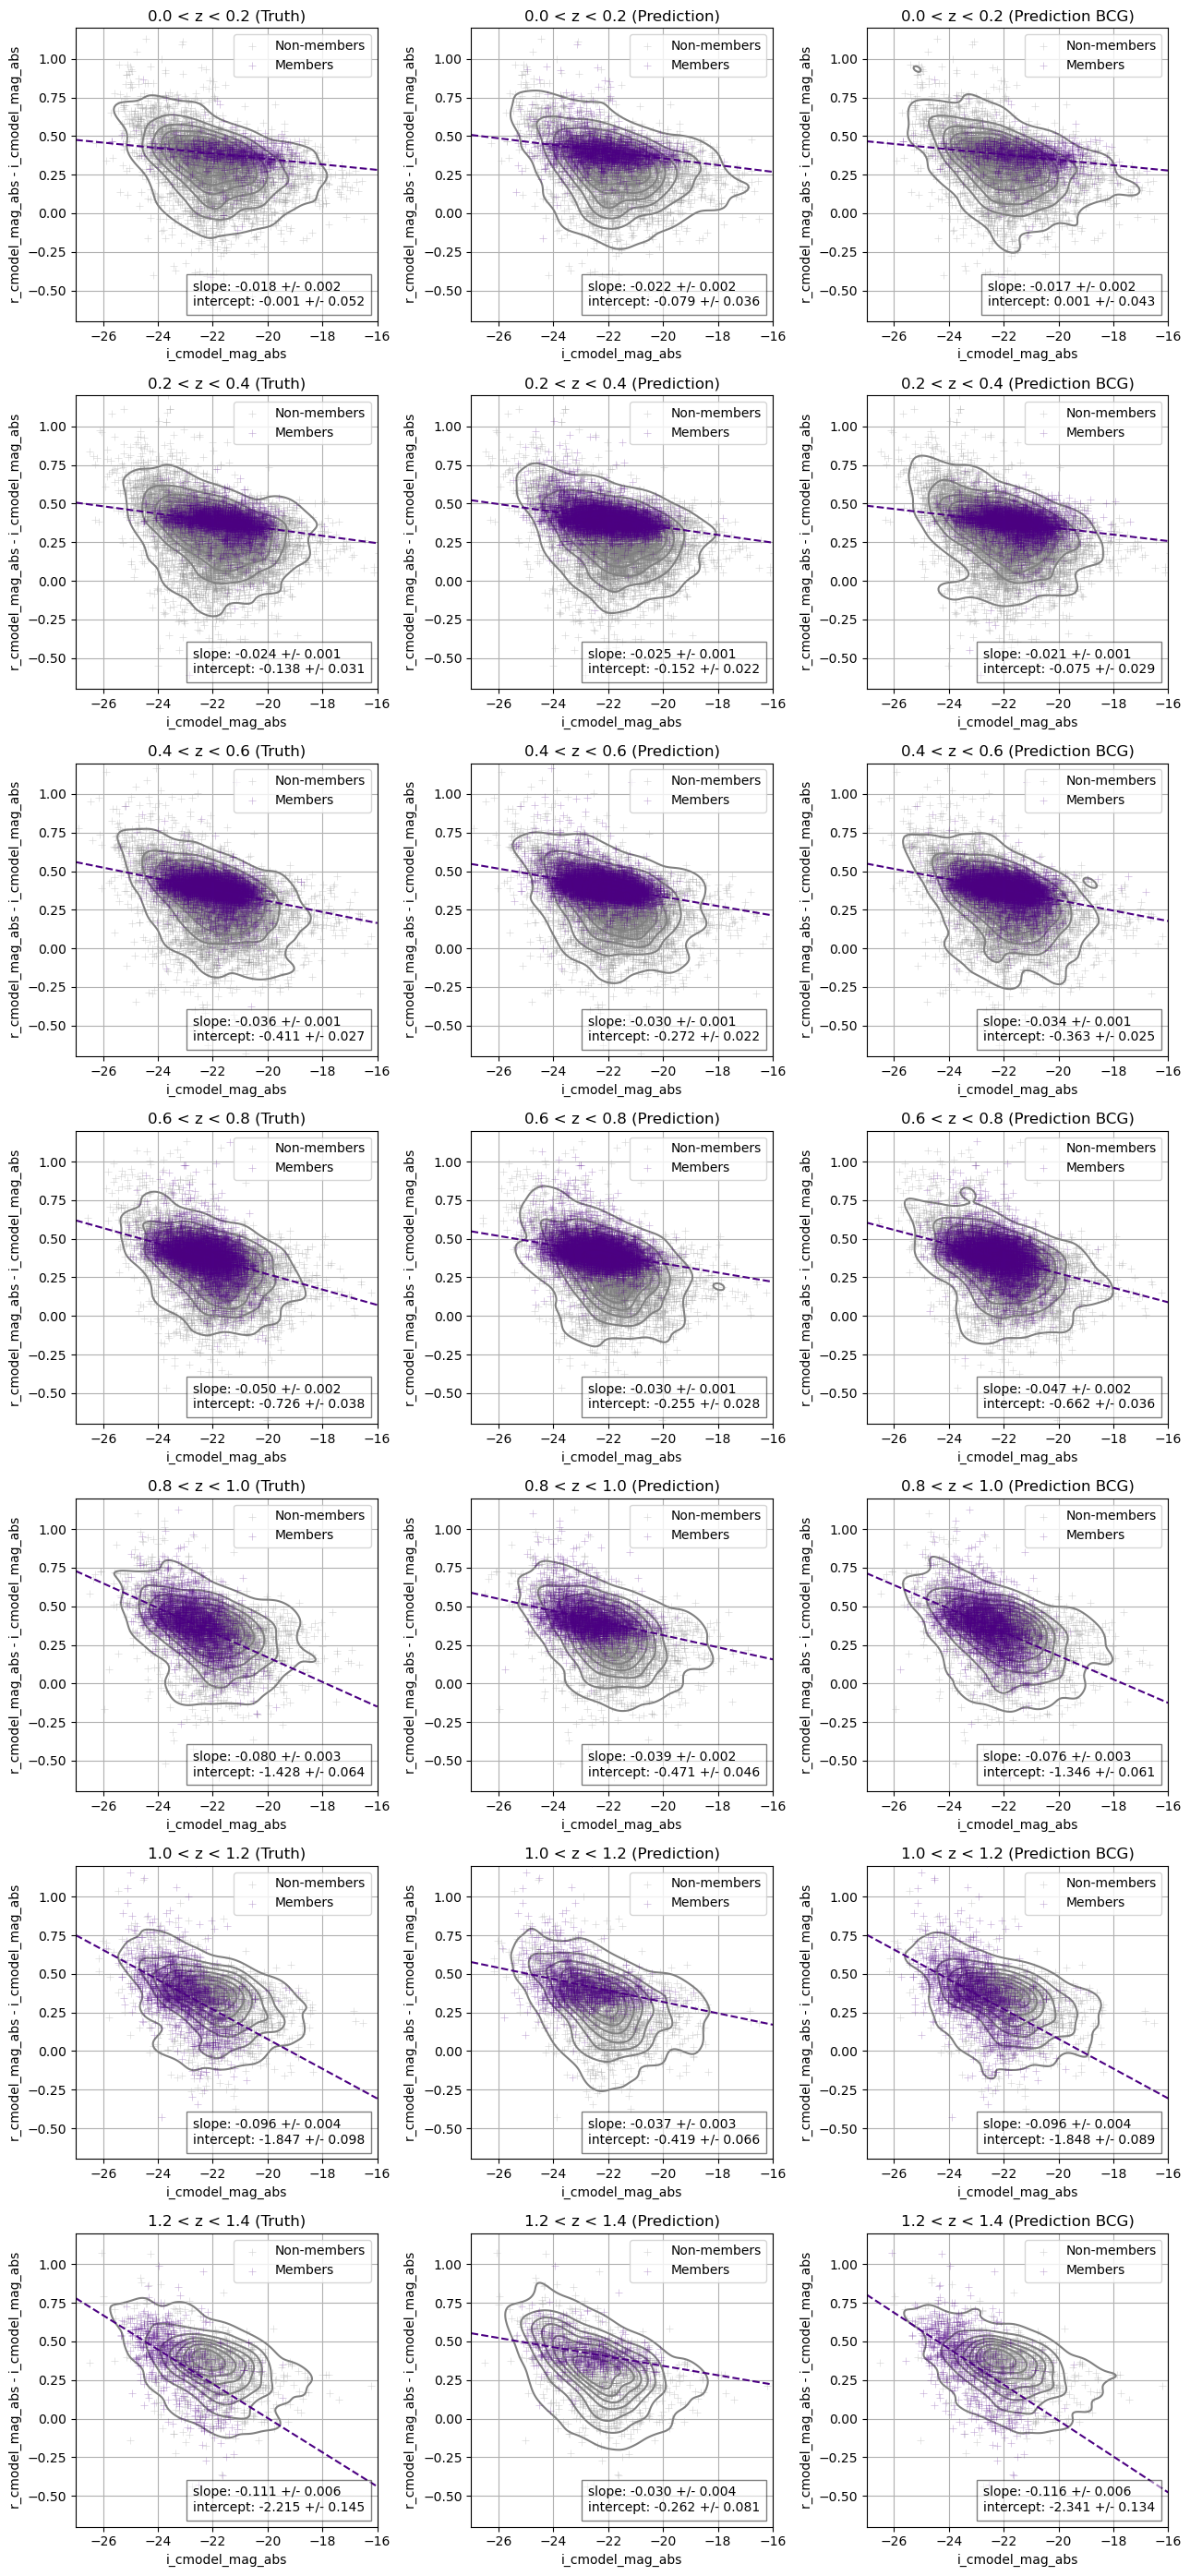

In [43]:
col_mag('r_cmodel_mag_abs', 'i_cmodel_mag_abs', (-0.7, 1.2), (-27,-16))